In [ ]:
file = '/content/drive/MyDrive/eng_subtitles_database.db'

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
conn = sqlite3.connect(file)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

[('zipfiles',)]


In [ ]:
cursor.execute("PRAGMA table_info('zipfiles')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

num
name
content


In [ ]:
df = pd.read_sql_query("""SELECT * FROM zipfiles""", conn)
df.head()

num                                               name  \
0  9180533                         the.message.(1976).eng.1cd   
1  9180583  here.comes.the.grump.s01.e09.joltin.jack.in.bo...   
2  9180592    yumis.cells.s02.e13.episode.2.13.(2022).eng.1cd   
3  9180594    yumis.cells.s02.e14.episode.2.14.(2022).eng.1cd   
4  9180600                              broker.(2022).eng.1cd   

                                             content  
0  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x1c\xa9\x...  
1  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x17\xb9\x...  
2  b'PK\x03\x04\x14\x00\x00\x00\x08\x00L\xb9\x99V...  
3  b'PK\x03\x04\x14\x00\x00\x00\x08\x00U\xa9\x99V...  
4  b'PK\x03\x04\x14\x00\x00\x00\x08\x001\xa9\x99V...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82498 entries, 0 to 82497
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   num      82498 non-null  int64 
 1   name     82498 non-null  object
 2   content  82498 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
import zipfile
import io

count = 0

def decode_method(binary_data):
    global count
    count += 1
    with io.BytesIO(binary_data) as f:
        with zipfile.ZipFile(f, 'r') as zip_file:
            subtitle_content = zip_file.read(zip_file.namelist()[0])
    return subtitle_content.decode('latin-1')

In [ ]:
df['file_content'] = df['content'].apply(decode_method)

df.head()

num                                               name  \
0  9180533                         the.message.(1976).eng.1cd   
1  9180583  here.comes.the.grump.s01.e09.joltin.jack.in.bo...   
2  9180592    yumis.cells.s02.e13.episode.2.13.(2022).eng.1cd   
3  9180594    yumis.cells.s02.e14.episode.2.14.(2022).eng.1cd   
4  9180600                              broker.(2022).eng.1cd   

                                             content  \
0  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x1c\xa9\x...   
1  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x17\xb9\x...   
2  b'PK\x03\x04\x14\x00\x00\x00\x08\x00L\xb9\x99V...   
3  b'PK\x03\x04\x14\x00\x00\x00\x08\x00U\xa9\x99V...   
4  b'PK\x03\x04\x14\x00\x00\x00\x08\x001\xa9\x99V...   

                                        file_content  
0  1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch an...  
1  1\r\n00:00:29,359 --> 00:00:32,048\r\nAh! Ther...  
2  1\r\n00:00:53,200 --> 00:00:56,030\r\n<i>Yumi'...  
3  1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch an...  
4  ï»¿1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch...

In [ ]:
df.tail()

num                                        name  \
82493  9521935            the.prophets.game.(2000).eng.1cd   
82494  9521937                  west.beirut.(1998).eng.1cd   
82495  9521938  frankenstein.the.true.story.(1973).eng.1cd   
82496  9521940  frankenstein.the.true.story.(1973).eng.1cd   
82497  9521941       zombie.island.massacre.(1984).eng.1cd   

                                                 content  \
82493  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xb8\xa6\x...   
82494  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x13\x97\x...   
82495  b'PK\x03\x04\x14\x00\x00\x00\x08\x00$\x97\x9aV...   
82496  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x97\x...   
82497  b'PK\x03\x04\x14\x00\x00\x00\x08\x00,\x97\x9aV...   

                                            file_content  
82493  ï»¿1\r\n00:01:16,284 --> 00:01:19,537\r\nGod,\...  
82494  1\r\n00:00:06,000 --> 00:00:12,074\r\napi.Open...  
82495  1\r\n00:00:01,001 --> 00:00:04,630\r\n(Dramati...  
82496  1\r\n00:00:06,000 --> 00:00:12,074\r\nAdvertis...  
82497  1\r\n00:00:01,919 --> 00:00:03,253\r\n(Sharp w...

In [ ]:
total_rows = len(df)
print(total_rows)
percentage = 0.4
num_rows_to_extract = int(total_rows * percentage)
print(num_rows_to_extract)

82498
32999


In [ ]:
data_to_write = df[:num_rows_to_extract]

In [ ]:
data_to_write.head()

num                                               name  \
0  9180533                         the.message.(1976).eng.1cd   
1  9180583  here.comes.the.grump.s01.e09.joltin.jack.in.bo...   
2  9180592    yumis.cells.s02.e13.episode.2.13.(2022).eng.1cd   
3  9180594    yumis.cells.s02.e14.episode.2.14.(2022).eng.1cd   
4  9180600                              broker.(2022).eng.1cd   

                                             content  \
0  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x1c\xa9\x...   
1  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x17\xb9\x...   
2  b'PK\x03\x04\x14\x00\x00\x00\x08\x00L\xb9\x99V...   
3  b'PK\x03\x04\x14\x00\x00\x00\x08\x00U\xa9\x99V...   
4  b'PK\x03\x04\x14\x00\x00\x00\x08\x001\xa9\x99V...   

                                        file_content  
0  1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch an...  
1  1\r\n00:00:29,359 --> 00:00:32,048\r\nAh! Ther...  
2  1\r\n00:00:53,200 --> 00:00:56,030\r\n<i>Yumi'...  
3  1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch an...  
4  ï»¿1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch...

In [ ]:
import re
timestamp_pattern = r'\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\r\n'

def remove_timestamps(text):
    return re.sub(timestamp_pattern, '', text)

data_to_write['file_content'] = data_to_write['file_content'].apply(remove_timestamps)


data_to_write.to_csv('cleaned_subtitles.csv', index=False)

print("Cleaned subtitles:")
print(data_to_write.head())

In [ ]:
import re

def clean_subtitle(subtitle_text):

    timestamp_pattern = r'\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}\r\n'

    cleaned_subtitle = re.sub(timestamp_pattern, '', subtitle_text)

    cleaned_subtitle = cleaned_subtitle.replace('\r\n', '')

    return cleaned_subtitle

data_to_write['file_content'] = data_to_write['file_content'].apply(clean_subtitle)

print("Cleaned subtitle:")
print(data_to_write.head())


In [ ]:
data_to_write.to_csv('output.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_data = pd.read_csv('output.csv')

In [ ]:
chunk_size = 10000
length = len(df_data)
print(length)
df_data.shape

In [ ]:
chunk_size = 5000
num_chunks = len(df_data) // chunk_size + 1

for i, chunk in enumerate(np.array_split(df_data, num_chunks)):
    chunk.to_csv(f"output_chunk_{i}.csv", index=False)

In [ ]:
import pandas as pd
import re
import os

def clean_text(text):
    cleaned_text = re.sub('<.*?>', '', text)
    return cleaned_text

directory = '/content/drive/MyDrive/outputfiles'

csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

for file in csv_files:

    df = pd.read_csv(os.path.join(directory, file))

    column_to_clean = 'file_content'

    df[column_to_clean] = df[column_to_clean].apply(clean_text)

    cleaned_file_path = os.path.join(directory, '' + file)
    df.to_csv(cleaned_file_path, index=False)

In [ ]:
import os
import pandas as pd

def clean_text(text):

    cleaned_text = ''.join([char for char in text if ord(char) < 128])

    cleaned_text = cleaned_text.strip()
    return cleaned_text

directory = '/content/drive/MyDrive/outputfiles'

csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

for file in csv_files:

    df = pd.read_csv(os.path.join(directory, file))


    column_to_clean = 'file_content'

    df[column_to_clean] = df[column_to_clean].apply(clean_text)

    cleaned_file_path = os.path.join(directory, '' + file)
    df.to_csv(cleaned_file_path, index=False)


In [ ]:
import pandas as pd
import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

directory = '/content/drive/MyDrive/outputfiles'

csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

for file in csv_files:

    df = pd.read_csv(os.path.join(directory, file))


    column_to_clean = 'file_content'

    df[column_to_clean] = df[column_to_clean].apply(remove_numbers)

    cleaned_file_path = os.path.join(directory, '' + file)
    df.to_csv(cleaned_file_path, index=False)


In [ ]:
!pip install WordCloud

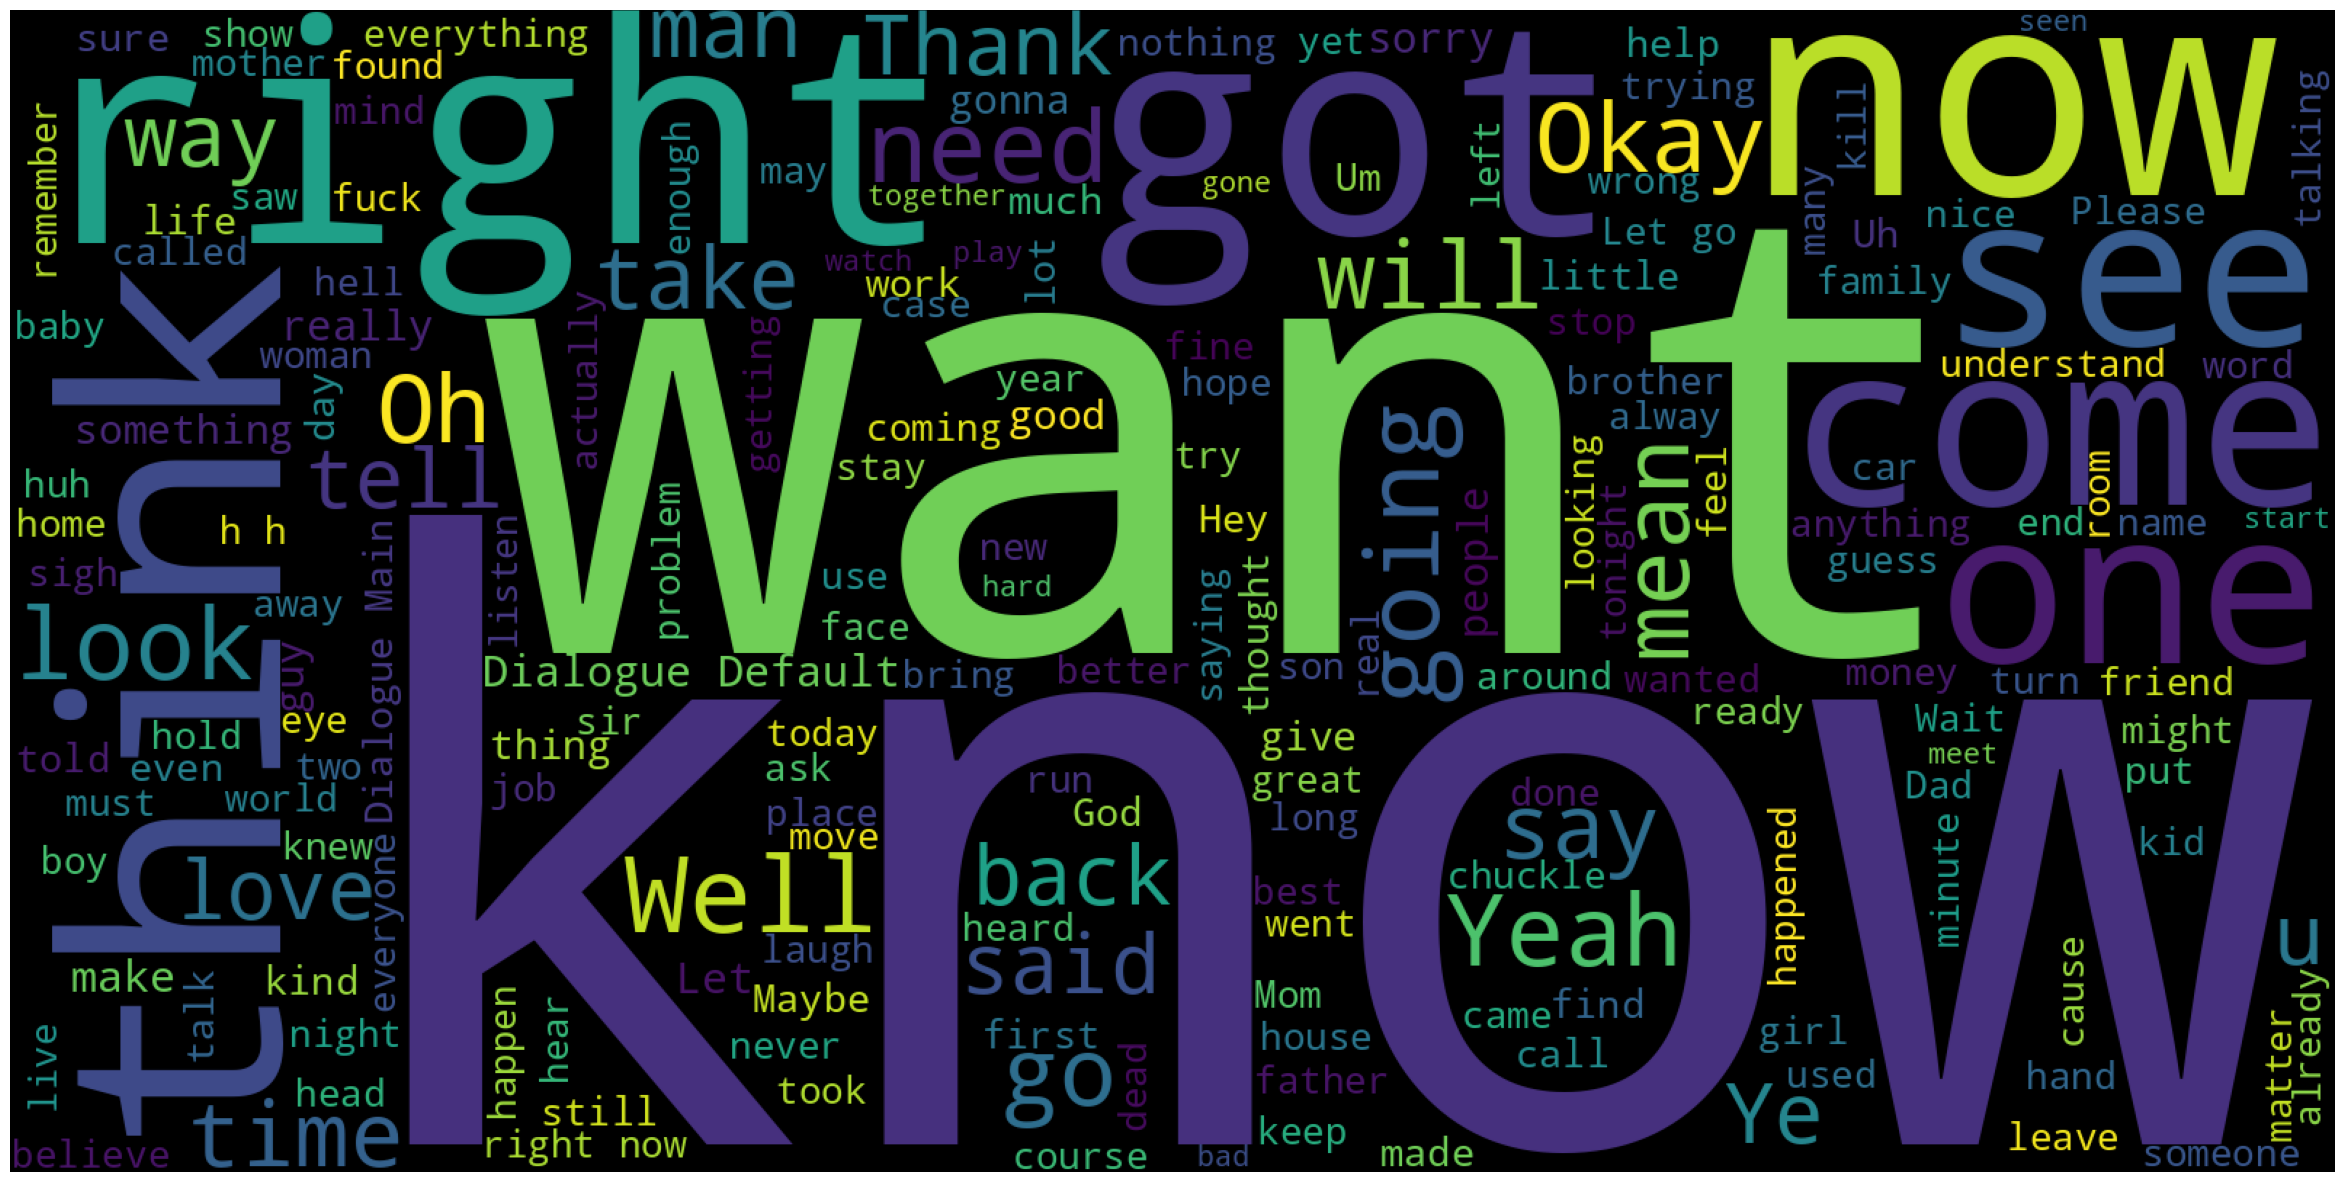

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df_clean['file_content']))
plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
df_clean['file_content'][0]

'Watch any video online with Open-SUBTITLESFree Browser extension: osdb.link/extIn the name of God, the most gracious, the most Merciful.From Muhammad, the Messenger of Godto Heraclius, the emperor of Byzantium.greetings to him who is thefollower of righteous guidance.I bid you to hear the divine call.I am the messenger of God to the people;accept Islam for your salvation.He speaks of a new prophet in Arabia.Was it like this when John, the Baptistcame to king Herodout of the desert, crying about salvation?To Muqawqis, Patriarch of Alexandria.Kisra, emperor of Persia.Muhammad calls you with the call of God.Accept Islam for your salvation...embrace Islam.You come out of the desert,smelling of camel and goat.To tell Persia where he should kneel?Muhammad, Messenger of God.Who gave him this authority?God sent Muhammadas a mercy to mankind.The Scholars and Historians of Islam -The University of Al-Azhar in CairoThe High Islamic Congress of the Shiat in LebanonThe makers of this film honour t

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


def apply_bert_embeddings(text):

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)


    with torch.no_grad():
        outputs = model(**inputs)


    embeddings = outputs.last_hidden_state[:, 0, :]

    return embeddings.numpy()


directory = '/content/drive/MyDrive/outputfiles'


for filename in os.listdir(directory):
    if filename.endswith('.csv'):

        df = pd.read_csv(os.path.join(directory, filename))

        df['bert_embeddings'] = df['file_content'].apply(apply_bert_embeddings)

        output_filename = os.path.splitext(filename)[0] + '_bert.csv'
        df.to_csv(os.path.join(directory, output_filename), index=False)


In [ ]:
import pandas as pd
df_bert = pd.read_csv('/content/drive/MyDrive/outputfiles/output_chunk_0_bert.csv')

In [ ]:
df_bert.head()

num                                               name  \
0  9180533                         the.message.(1976).eng.1cd   
1  9180583  here.comes.the.grump.s01.e09.joltin.jack.in.bo...   
2  9180592    yumis.cells.s02.e13.episode.2.13.(2022).eng.1cd   
3  9180594    yumis.cells.s02.e14.episode.2.14.(2022).eng.1cd   
4  9180600                              broker.(2022).eng.1cd   

                                             content  \
0  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x1c\xa9\x...   
1  b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x17\xb9\x...   
2  b'PK\x03\x04\x14\x00\x00\x00\x08\x00L\xb9\x99V...   
3  b'PK\x03\x04\x14\x00\x00\x00\x08\x00U\xa9\x99V...   
4  b'PK\x03\x04\x14\x00\x00\x00\x08\x001\xa9\x99V...   

                                        file_content  \
0  Watch any video online with Open-SUBTITLESFree...   
1  Ah! There's PrincessDawn and Terry with theBlo...   
2  Yumi's Cells Episode Extremely Polite YumiYumi...   
3  Watch any video online with Open-SUBTITLESFree...   
4  Watch any video online with Open-SUBTITLESFree...   

                                     bert_embeddings  
0  [[-4.12755936e-01  1.24197498e-01 -1.52243555e...  
1  [[-4.16971654e-01  9.65884849e-02  3.66127819e...  
2  [[-5.94618618e-02 -3.20843965e-01  1.86195537e...  
3  [[-4.75930087e-02 -5.53795576e-01  1.19095020e...  
4  [[-2.97914408e-02 -2.87034037e-03  2.93085247e...

In [ ]:
!pip install sparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import save_npz, vstack

directory = '/content/drive/MyDrive/outputfiles'


vectorizer = TfidfVectorizer()


text_data = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):

        df = pd.read_csv(os.path.join(directory, filename))

        text_data.extend(df['file_content'].astype(str).tolist())

vectorizer.fit(text_data)

sparse_matrices = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):

        df = pd.read_csv(os.path.join(directory, filename))

        text_data = df['file_content'].astype(str).tolist()

        sparse_matrix = vectorizer.transform(text_data)

        sparse_matrices.append(sparse_matrix)

concatenated_matrix = vstack(sparse_matrices)

save_npz('sparse_matrix.npz', concatenated_matrix)

In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 46

In [ ]:
import csv
import chromadb
from collections import defaultdict
import os


client = chromadb.PersistantClient('/content/drive/MyDrive/chromadb')
collection = client.create_or_get_collection('bert_embeddings')

csv_directory = '/content/drive/MyDrive/bertfiles'

embeddings_dict = defaultdict(list)

for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        print(filename)
        csv_file_path = os.path.join(csv_directory, filename)

        with open(csv_file_path, 'r') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:

                doc_id = row[0]
                embedding = [str(val) for val in row[1:]]
                embeddings_dict[doc_id].extend(embedding)

for doc_id, embedding in embeddings_dict.items():
    collection.add(doc_id, embedding)

client.close()


In [ ]:
import IPython

IPython.get_ipython().run_line_magic('config', 'NotebookApp.iopub_data_rate_limit = 100000000')

In [ ]:
import pandas as pd
import os

directory = '/content/drive/MyDrive/bertfiles'

dfs = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):

        df = pd.read_csv(os.path.join(directory, filename))

        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_csv('/content/drive/MyDrive/subtiltes.csv', index=False)


In [ ]:
df_csv = pd.read_csv('/content/drive/MyDrive/subtiltes.csv')

In [ ]:
df_csv.shape

(32999, 5)

In [ ]:
df_csv['bert_embeddings']

0        [[-4.12755936e-01  1.24197498e-01 -1.52243555e...
1        [[-4.16971654e-01  9.65884849e-02  3.66127819e...
2        [[-5.94618618e-02 -3.20843965e-01  1.86195537e...
3        [[-4.75930087e-02 -5.53795576e-01  1.19095020e...
4        [[-2.97914408e-02 -2.87034037e-03  2.93085247e...
                               ...                        
32994    [[-2.83848971e-01 -1.60707291e-02  2.19071060e...
32995    [[-3.49944353e-01  2.08567202e-01  4.23076153e...
32996    [[-3.39718550e-01 -2.87812978e-01  2.94908732e...
32997    [[-3.64492655e-01  1.89115107e-01  3.31626475e...
32998    [[-3.64492655e-01  1.89115107e-01  3.31626475e...
Name: bert_embeddings, Length: 32999, dtype: object

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/subtiltes.csv')

for index, row in df.iterrows():

    embeddings = [str(value) for value in row['bert_embeddings'].split(',')]

    df.at[index, 'embeddings_list'] = embeddings

print(df)
